p-value is: 0.5506953597068787
p-value is: 0.8637524843215942
p-value is: 0.4205053448677063
p-value is: 0.6618951559066772


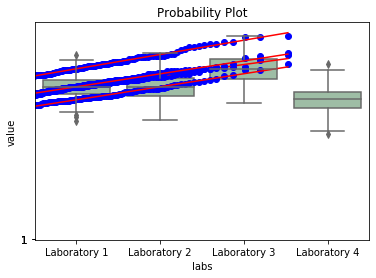

CI interval for lab1 176.00457168313648 180.7185949835303
CI interval for lab2 176.2267986376835 181.57903469565014
CI interval for lab3 196.95409593154397 202.8724040684561
CI interval for lab4 160.9837363606001 166.38176363939974


In [62]:
####################################################

# Assignment of Hypothesis Testing
# Assignment problem on Lab data

## @author: Sarang Thakare (Recreated afer System crash)

###################################################

# Import packages and libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from scipy import stats
import pylab
import seaborn as sb
import statsmodels as sm
from statsmodels.formula.api import ols
import math as math

###################################################

# Load Dataset

lab_tat = pd.read_csv("C:\\Users\\320101002\\Documents\\Data_Science\\3_Hypothesis Testing\\Download_3\\LabTAT.csv")
lab_tat.shape # To see number of records and columns, 120 observations and 4 labs
lab_tat.head(10) # to see top 10 observations of the data

###################################################

# Business Problem

# To evaluate if reports from 4 labs have statistical difference 

# Ho = Null Hypothesis:  There is NO difference in Turn Around Time in four labs
# Ha = At least one of the lab has different Turn around time than others

###################################################

# Assigning names to the data sets

lab1 = lab_tat['Laboratory 1']
lab2 = lab_tat['Laboratory 2']
lab3 = lab_tat['Laboratory 3']
lab4 = lab_tat['Laboratory 4']

###################################################

# Exploratory Data Analysis

#Doing Normality test 
# Ho: Data are normal
# Ha: Data are not normal

plt.hist(lab1,label='Lab 1')
plt.hist(lab2,label='Lab 1')
plt.hist(lab3,label='Lab 1')
plt.hist(lab4,label='Lab 1')

plt.boxplot(lab1,vert=False)
plt.boxplot(lab2,vert=False)
plt.boxplot(lab3,vert=False)
plt.boxplot(lab4,vert=False)





 # No abormality was seen frm the Histogram and Box plots

stats.probplot(lab1,plot=pylab)
stats.probplot(lab2,plot=pylab)
stats.probplot(lab3,plot=pylab)
stats.probplot(lab4,plot=pylab)

lab1_norm = stats.shapiro(lab1)
lab1_p = lab1_norm[1]
print("p-value is: "+str(lab1_p)) # P = 0.55 > 0.05 Null fly Data normal

lab2_norm = stats.shapiro(lab2)
lab2_p = lab2_norm[1]
print("p-value is: "+str(lab2_p)) # P = 0.86 > 0.05 Null fly Data normal

lab3_norm = stats.shapiro(lab3)
lab3_p = lab3_norm[1]
print("p-value is: "+str(lab3_p)) # P = 0.42 > 0.05 Null fly Data normal

lab4_norm = stats.shapiro(lab4)
lab4_p = lab4_norm[1]
print("p-value is: "+str(lab4_p)) # P = 0.66 > 0.05 Null fly Data normal

# P values of all 4 labs are greater than 0.05 implying that data are normal

###################################################

# Models to be used
# X is Discret Variable - Lab 1, Lab 2, lab 3 and lab 4
# Y is continuous variable - Turn around Time
# Need to use ANOVA est to check if the means are different if the variances are same  

###################################################

# One way Anova 

from statsmodels.formula.api import ols # Performing Mann whitney

#Varience Test 
scipy.stats.levene(lab1, lab2) 
scipy.stats.levene(lab1, lab3) 
scipy.stats.levene(lab1, lab4) 
scipy.stats.levene(lab2, lab3) 
scipy.stats.levene(lab2, lab4)
scipy.stats.levene(lab3, lab4)

scipy.stats.levene(lab1, lab2, lab3, lab4)

# Overall P is 0.0516 > 0.05 Variances of all 4 labs are comparable. We can proceed with Anova



###################################################

import pandas as pd
# load data file
df = pd.read_csv("C:\\Users\\320101002\\Documents\\Data_Science\\3_Hypothesis Testing\\Download_3\\LabTAT.csv")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4'])
# replace column names
df_melt.columns = ['index', 'labs', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='labs', y='value', data=df_melt, color='#99c2a2')

plt.show()

# Lab 3 and 4 appear to be different than 1 and 2
# Lan 1 and 2 appear to be very similar

###################################################


#####################################################

# Determine Confidence interval of mean for each lab

 # Finding confidence interval of means for both unit a andf unit b

from scipy.stats import norm
n = len(lab_tat)
conf_coeff = 0.95
alpha = 1 - conf_coeff

xbar_lab1 =lab1.mean()
xbar_lab1
stddev_lab1 = lab1.std()
stddev_lab1

xbar_lab2 =lab2.mean()
xbar_lab2
stddev_lab2 = lab2.std()
stddev_lab2

xbar_lab3 =lab3.mean()
xbar_lab3
stddev_lab3 = lab3.std()
stddev_lab3

xbar_lab4 =lab4.mean()
xbar_lab4
stddev_lab4 = lab4.std()
stddev_lab4

z_critical = stats.norm.ppf(q=0.975) # Z value for 95% confidence i.e.at Z = 0.975
z_critical

# Standard Error of Mean = Std Deviation / Sqrt n
se_lab1 = z_critical*stddev_lab1/math.sqrt(n)
se_lab2 = z_critical*stddev_lab2/math.sqrt(n)
se_lab3 = z_critical*stddev_lab3/math.sqrt(n)
se_lab4 = z_critical*stddev_lab4/math.sqrt(n)

CI_lower_lab1 = xbar_lab1 - se_lab1
CI_upper_lab1 = xbar_lab1 + se_lab1

CI_lower_lab2 = xbar_lab2 - se_lab2
CI_upper_lab2 = xbar_lab2 + se_lab2

CI_lower_lab3 = xbar_lab3 - se_lab3
CI_upper_lab3 = xbar_lab3 + se_lab3

CI_lower_lab4 = xbar_lab4 - se_lab4
CI_upper_lab4 = xbar_lab4 + se_lab4

print("CI interval for lab1",CI_lower_lab1,CI_upper_lab1)
print("CI interval for lab2",CI_lower_lab2,CI_upper_lab2)
print("CI interval for lab3",CI_lower_lab3,CI_upper_lab3)
print("CI interval for lab4",CI_lower_lab4,CI_upper_lab4)

# From the confidence interval we see that Lab 1 and Lab 2 do not have statistical significance
# Lab 3 has HIGHER turnaround
# Lab 4 has LESS turnaround 

#####################################################